# Data Visualization

### 📩Import the dependancies and load the dataset

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("obesity_dataset.csv")

In [3]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

### ✂️Before visualization,let's do some data cleaning:

Renamed confusing, or inconsistent column names to short, readable, and consistent names.

In [4]:
df.rename(columns={
    'Gender': 'gender',
    'Age': 'age',
    'Height': 'height',
    'Weight': 'weight',
    'family_history_with_overweight	':'family_history',
    'FAVC':'high_caloric_food',
    'FCVC':'veggies_freq',
    'NCP':'main_meals_freq',
    'CAEC':'eat_between_meals',
    'SMOKE':'smoke',
    'CH2O':'water_l_per_day',
    'SCC':'monitor_calories',
    'FAF':'physical_activity_freq',
    'TUE':'screen_time_hr',
    'CALC':'alcohol_freq',
    'MTRANS':'transport_mode',
    'NObeyesdad':'obesity_level'
}, inplace=True)
df.head()

gender   age  height  weight family_history_with_overweight  \
0  Female  21.0    1.62    64.0                            yes   
1  Female  21.0    1.52    56.0                            yes   
2    Male  23.0    1.80    77.0                            yes   
3    Male  27.0    1.80    87.0                             no   
4    Male  22.0    1.78    89.8                             no   

  high_caloric_food  veggies_freq  main_meals_freq eat_between_meals smoke  \
0                no           2.0              3.0         Sometimes    no   
1                no           3.0              3.0         Sometimes   yes   
2                no           2.0              3.0         Sometimes    no   
3                no           3.0              3.0         Sometimes    no   
4                no           2.0              1.0         Sometimes    no   

   water_l_per_day monitor_calories  physical_activity_freq  screen_time_hr  \
0              2.0               no                     0.0             1.0   
1              3.0              yes                     3.0             0.0   
2              2.0               no                     2.0             1.0   
3              2.0               no                     2.0             0.0   
4              2.0               no                     0.0             0.0   

  alcohol_freq         transport_mode        obesity_level  
0           no  Public_Transportation        Normal_Weight  
1    Sometimes  Public_Transportation        Normal_Weight  
2   Frequently  Public_Transportation        Normal_Weight  
3   Frequently                Walking   Overweight_Level_I  
4    Sometimes  Public_Transportation  Overweight_Level_II

Converted all categorical/binary column values to lowercase

In [5]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower()

df.head()

gender   age  height  weight family_history_with_overweight  \
0  female  21.0    1.62    64.0                            yes   
1  female  21.0    1.52    56.0                            yes   
2    male  23.0    1.80    77.0                            yes   
3    male  27.0    1.80    87.0                             no   
4    male  22.0    1.78    89.8                             no   

  high_caloric_food  veggies_freq  main_meals_freq eat_between_meals smoke  \
0                no           2.0              3.0         sometimes    no   
1                no           3.0              3.0         sometimes   yes   
2                no           2.0              3.0         sometimes    no   
3                no           3.0              3.0         sometimes    no   
4                no           2.0              1.0         sometimes    no   

   water_l_per_day monitor_calories  physical_activity_freq  screen_time_hr  \
0              2.0               no                     0.0             1.0   
1              3.0              yes                     3.0             0.0   
2              2.0               no                     2.0             1.0   
3              2.0               no                     2.0             0.0   
4              2.0               no                     0.0             0.0   

  alcohol_freq         transport_mode        obesity_level  
0           no  public_transportation        normal_weight  
1    sometimes  public_transportation        normal_weight  
2   frequently  public_transportation        normal_weight  
3   frequently                walking   overweight_level_i  
4    sometimes  public_transportation  overweight_level_ii

# 📊Now let's do Data Visualization

## 1. Univariate Analysis (Single Column)

### A. Histogram (Numeric Column)

#### ❓When to use:
* To see the distribution (skewed, uniform, multi-modal)
* To detect outliers and clusters

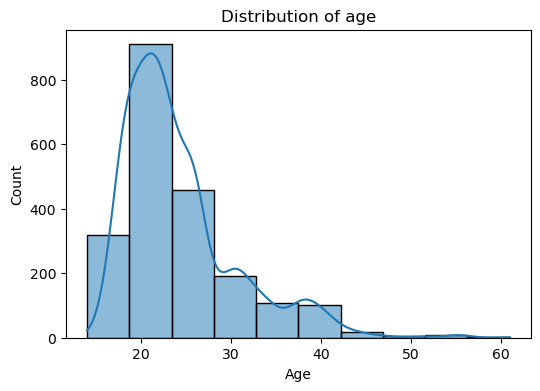

In [6]:
plt.figure(figsize=(6,4))

sns.histplot(df['age'],bins=10,kde=True)
plt.title("Distribution of age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


#### Customization:
* Change bins=20 → change number of bins
* Change kde=True/False → add/remove density curve
* Add color='red' → change color

### B. Boxplot (Numeric Column)

#### ❓When to use:
To see median, quartiles, and outliers

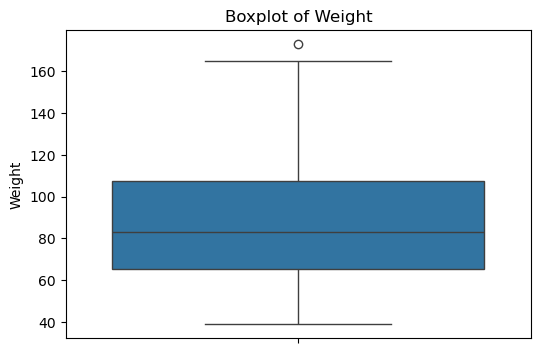

In [7]:
plt.figure(figsize=(6,4))

sns.boxplot(y=df['weight'])
plt.title('Boxplot of Weight')
plt.ylabel('Weight')
plt.show()

#### Customization:

* Horizontal boxplot: x=df['age']
* Add palette: eg, palette='Set2'

### C. Countplot (Categorical Column)

#### ❓When to use:
* You can check the counts or frequency between classes/target variable/outcome.
* You can identify imbalanced datasets.

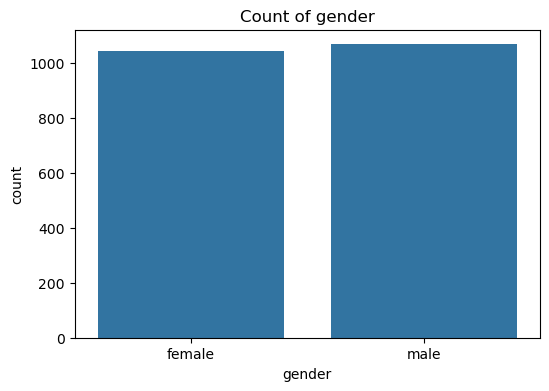

In [8]:
plt.figure(figsize=(6,4))

sns.countplot(x='gender',data=df)
plt.title('Count of gender')
plt.show()

#### Customization:
* Add hue: hue='obesity_level' to see obesity levels by gender
* Rotate labels: plt.xticks(rotation=45)

## Bivariate Analysis (Two Variables)

### A. Scatter Plot

#### ❓When to use:

* Two numeric columns to see relationship or correlation
* Color by category to explore patterns

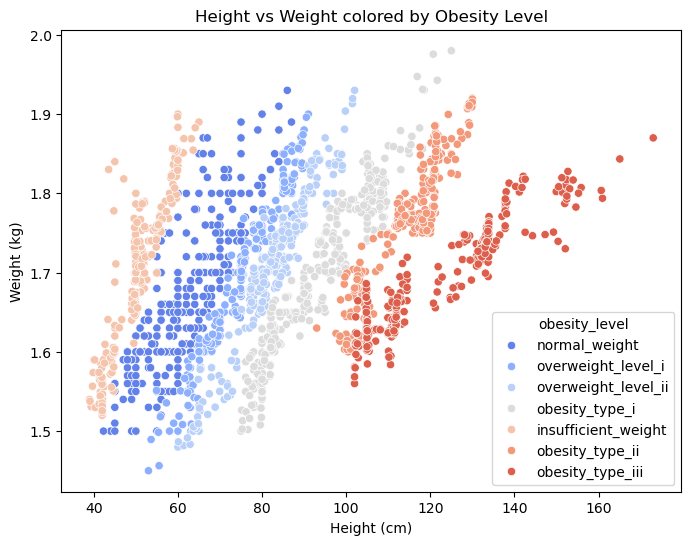

In [9]:
plt.figure(figsize=(8,6))

sns.scatterplot(x='weight',y='height',hue='obesity_level',data=df,palette='coolwarm')

plt.title('Height vs Weight colored by Obesity Level')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

#### Customization:
* style='gender' → differentiate markers by gender
* s=100 → marker size
* alpha=0.7 → transparency

### B. Boxplot (Numeric vs Categorical)

#### ❓When to use:
* When you want a quick summary of the distribution.
* Compare distributions of a numeric column across categories

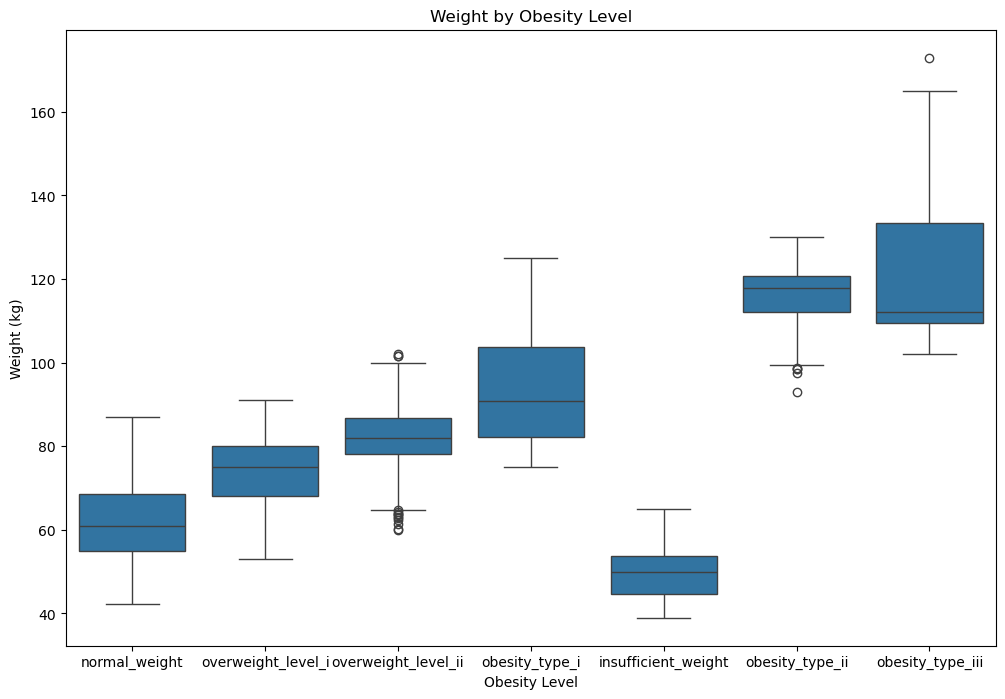

In [10]:
plt.figure(figsize=(12,8))

sns.boxplot(x='obesity_level', y='weight', data=df)\

plt.title('Weight by Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Weight (kg)')
plt.show()


#### Customization:
* Split by gender: hue='gender', split=True
* Change color palette: palette='coolwarm'

### C. Violin Plot (Numeric vs Categorical)

#### ❓When to use:
* Distribution + density estimation, often for comparing groups
* Good for detecting multimodal distributions (multiple peaks).
* Useful when you want a more detailed visual summary than a boxplot.

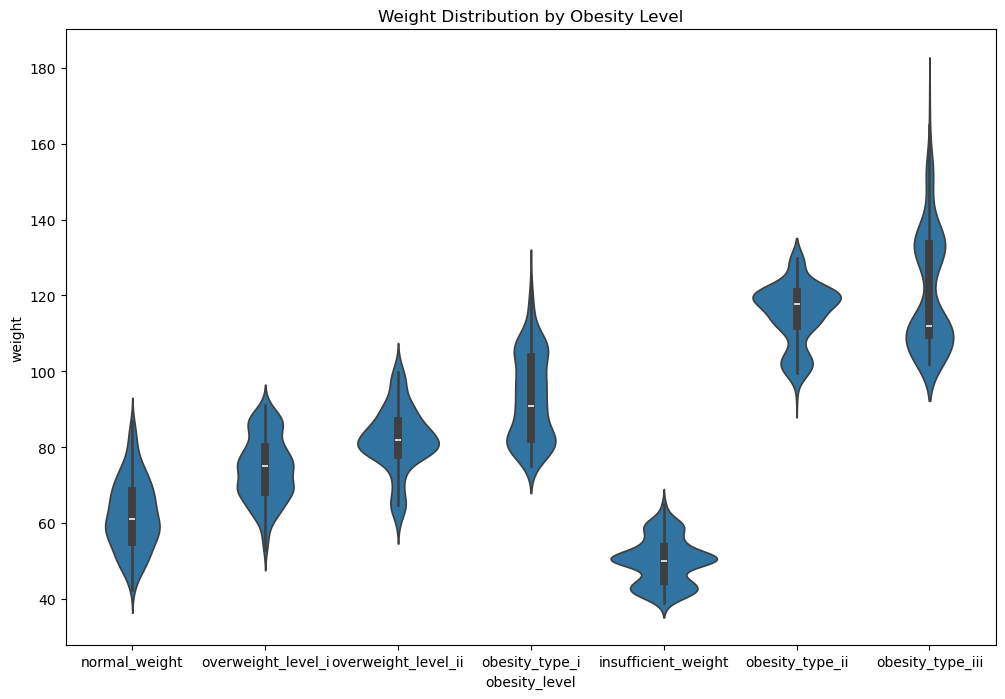

In [11]:
plt.figure(figsize=(12,8))
sns.violinplot(x='obesity_level', y='weight', data=df)

plt.title('Weight Distribution by Obesity Level')
plt.show()

### D. Countplot with Hue (Categorical vs Categorical)

#### ❓When to use:
* When you want to compare categories against another categorical variable.
* To check how categories relate to target variable
* Do NOT use countplot for numeric variables (use histogram instead).

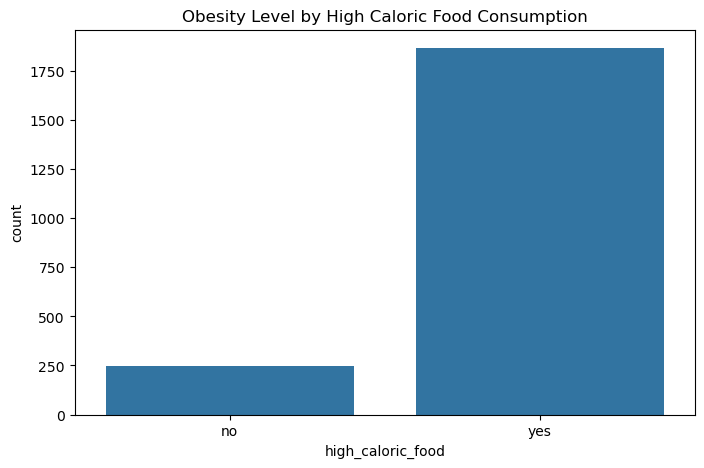

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='high_caloric_food', data=df)
plt.title('Obesity Level by High Caloric Food Consumption')
plt.show()

## 3. Multivariate / Correlation Analysis 

### A. Correlation Heatmap

#### ❓When to use:
* Find relationships between numeric features
* Check for multicollinearity before modeling

In [13]:
numeric_columns=df.select_dtypes(include=['int64','float64']).columns

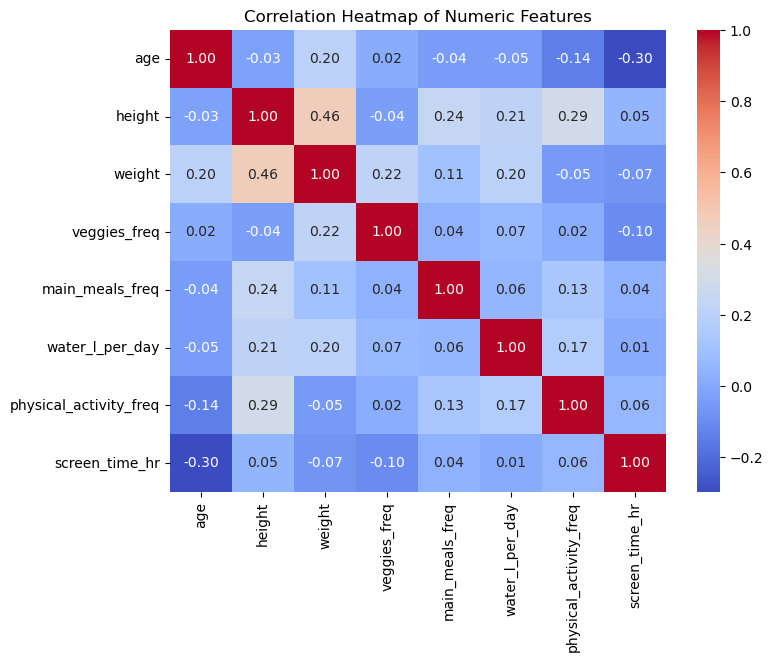

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap of Numeric Features')
plt.show()

#### Customization:
* Change cmap: eg: cmap='viridis'
* Remove annotation: annot=False

### B. Pair plot 

#### ❓When to use it?
* To see pairwise relationships for multiple numeric variables
* Identify clusters or patterns in the data.
* See distribution differences across categories (with hue).

In [15]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

<Figure size 1200x800 with 0 Axes>

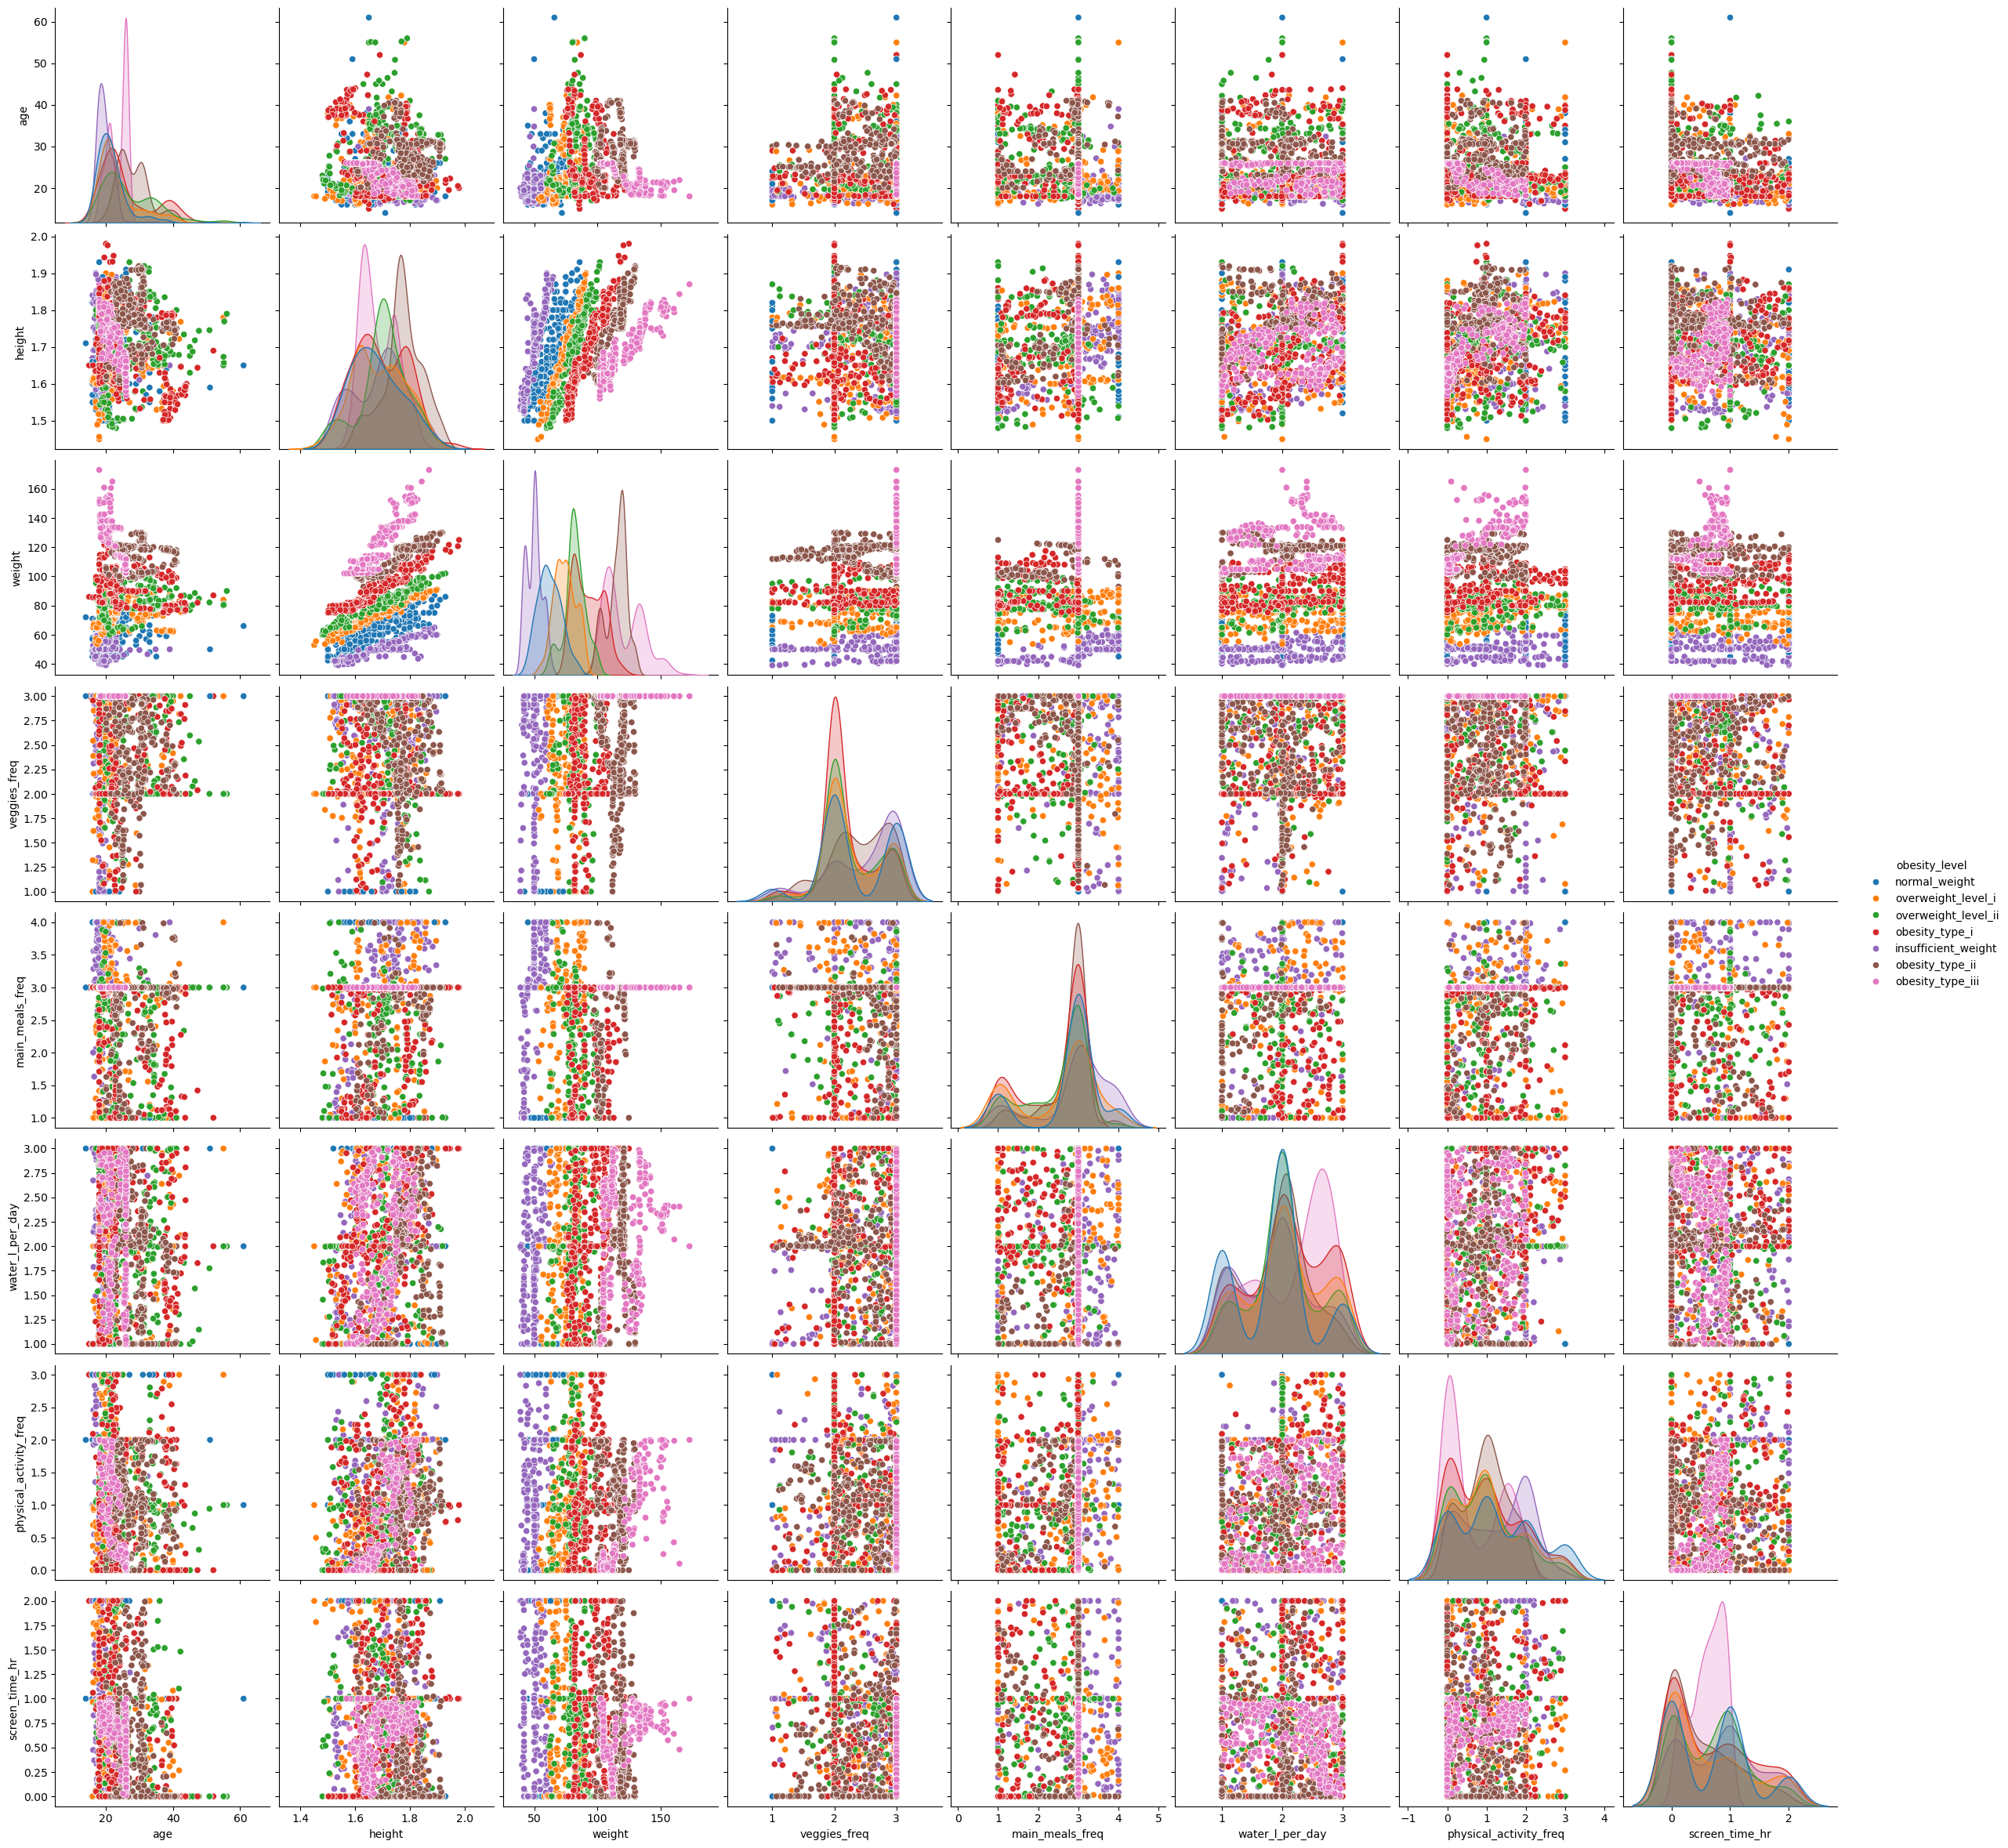

In [16]:
plt.figure(figsize=(12,8))
sns.pairplot(df[numeric_cols + ['obesity_level']],hue='obesity_level',height=3)

plt.show()